<a href="https://colab.research.google.com/github/GildasTaliah/MeanVarianceOptimz/blob/main/EuroIndicesAnalytics_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Euro Indices Analytics

In [1]:
import os
import urllib

# Index file location - Url
url_path =  'http://www.stoxx.com/download/historical_values/'

stoxxeu600_url = url_path + 'hbrbcpe.txt'
vstoxx_url = url_path + 'h_vstoxx.txt'

# Create local folder to save files
data_folder = 'data/'     # Save to this folder
# Check if local target exist
print(os.makedirs(data_folder, exist_ok = True))

# Create file paths - filepath
stoxxeu600_filepath = os.path.join(data_folder, "stoxxeu600.txt")
vstoxx_filepath = os.path.join(data_folder, "vstoxx.txt")

None


In [2]:
# Custom headers to mimic browser request
# Important for successful download
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
  }

# Function to download files headers
def download_file(url, filepath):
  try:
    req = urllib.request.Request(url, headers = headers)
    with urllib.request.urlopen(req) as response, open(filepath, 'wb') as outfile:
      outfile.write(response.read())
    print(f"Downloaded {url} to {filepath}")
  except Exception as e:
    print(f"Failed to download {url}: {e}")


# Now connect to API, and download file to file path
download_file(stoxxeu600_url, stoxxeu600_filepath)
download_file(vstoxx_url, vstoxx_filepath)

Downloaded http://www.stoxx.com/download/historical_values/hbrbcpe.txt to data/stoxxeu600.txt
Downloaded http://www.stoxx.com/download/historical_values/h_vstoxx.txt to data/vstoxx.txt


In [3]:
# Confirm files exist
print(os.path.isfile(stoxxeu600_filepath))

os.path.isfile(vstoxx_filepath)

True


True

In [4]:
# Read headlines for stoxxx
with open(stoxxeu600_filepath, 'r') as opened_file:
    for i in range(5):
        print(opened_file.readline())

Price Indices - EURO Currency

Date    ;Blue-Chip;Blue-Chip;Broad    ; Broad   ;Ex UK    ;Ex Euro Zone;Blue-Chip; Broad

        ;  Europe ;Euro-Zone;Europe   ;Euro-Zone;         ;            ; Nordic  ; Nordic

        ;  SX5P   ;  SX5E   ;SXXP     ;SXXE     ; SXXF    ;    SXXA    ;    DK5F ; DKXF

31.12.1986;775.00 ;  900.82 ;   82.76 ;   98.58 ;   98.06 ;   69.06 ;  645.26  ;  65.56



In [5]:
# After the view, we can now download easily
import pandas as pd
columns = ['Date', 'SX5P', 'SX5E', 'SXXP', 'SXXE',
              'SXXF', 'SXXA', 'DK5F', 'DKXF', 'EMPTY']
stoxxeu600 = pd.read_csv(stoxxeu600_filepath,
                    index_col=0,
                    parse_dates=True,
                    dayfirst=True,
                    header=None,
                    skiprows=4,
                    names=columns, sep=';'
                    )

In [6]:
stoxxeu600

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,EMPTY
Date,,,,,,,,,
1986-12-31,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56,NaN
1987-01-01,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56,NaN
1987-01-02,770.89,891.78,82.57,97.80,97.43,69.37,647.62,65.81,NaN
1987-01-05,771.89,898.33,82.82,98.60,98.19,69.16,649.94,65.82,NaN
1987-01-06,775.92,902.32,83.28,99.19,98.83,69.50,652.49,66.06,NaN
...,...,...,...,...,...,...,...,...,...
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27,NaN
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60,NaN
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26,NaN


In [7]:
# Delete empty column: EMPTY
del stoxxeu600['EMPTY']

In [8]:
# Save as csv for easy retrieval
stoxxeu600.to_csv('stoxxeu600.csv')

# Now read data
stoxxeu600 = pd.read_csv('stoxxeu600.csv', index_col=0, parse_dates=True)
stoxxeu600

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
Date,,,,,,,,
1986-12-31,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
1987-01-01,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
1987-01-02,770.89,891.78,82.57,97.80,97.43,69.37,647.62,65.81
1987-01-05,771.89,898.33,82.82,98.60,98.19,69.16,649.94,65.82
1987-01-06,775.92,902.32,83.28,99.19,98.83,69.50,652.49,66.06
...,...,...,...,...,...,...,...,...
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26


<Axes: xlabel='Date'>

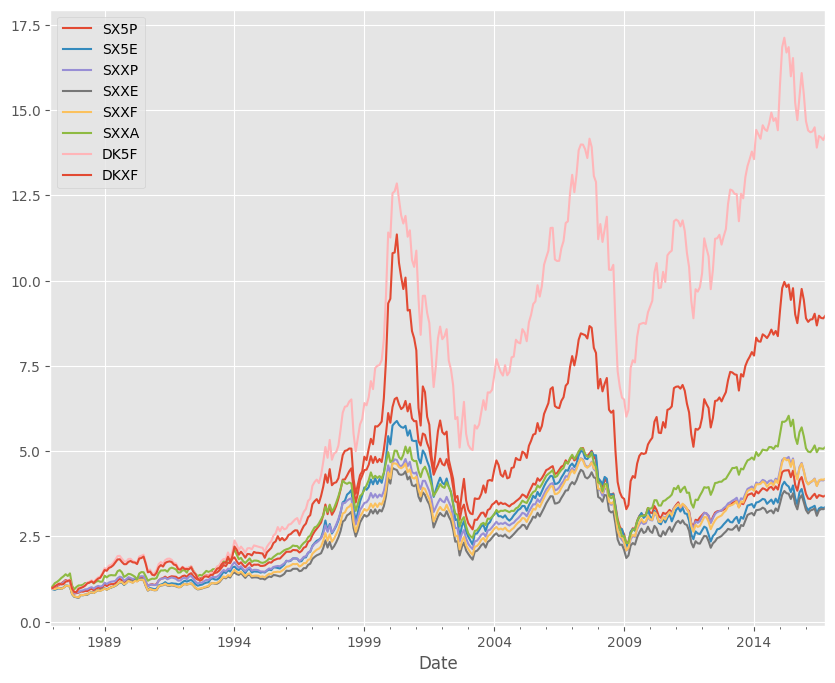

In [38]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

norm_stoxx = stoxxeu600.div( stoxxeu600.iloc[0])
norm_stoxx.resample('M').last().plot(subplots=False, figsize=(10, 8), grid=True)

In [39]:
stoxxeu600.pct_change().corr()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
SX5P,1.000000,0.971184,0.991923,0.971269,0.976083,0.972517,0.891755,0.884861
SX5E,0.971184,1.000000,0.971100,0.994512,0.988025,0.909379,0.889065,0.883671
SXXP,0.991923,0.971100,1.000000,0.979871,0.985004,0.979860,0.910149,0.899806
SXXE,0.971269,0.994512,0.979871,1.000000,0.995948,0.920890,0.904053,0.897481
SXXF,0.976083,0.988025,0.985004,0.995948,1.000000,0.934809,0.919704,0.911232
SXXA,0.972517,0.909379,0.979860,0.920890,0.934809,1.000000,0.879582,0.865911
DK5F,0.891755,0.889065,0.910149,0.904053,0.919704,0.879582,1.000000,0.981443
DKXF,0.884861,0.883671,0.899806,0.897481,0.911232,0.865911,0.981443,1.000000


In [40]:
# Read headlines for Vsstoxx
with open(vstoxx_filepath, 'r') as opened_file:
    for i in range(5):
        print(opened_file.readline())

EURO STOXX 50 Volatility Indices,,,,,,,,,

 ,VSTOXX,Sub-Index 1M,Sub-Index 2M,Sub-Index 3M,Sub-Index 6M,Sub-Index 9M,Sub-Index 12M,Sub-Index 18M,Sub-Index 24M

Date,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8

04.01.1999,18.2033,21.2458,17.5555,31.2179,33.3124,33.7327,33.2232,31.8535,23.8209

05.01.1999,29.6912,36.6400,28.4274,32.6922,33.7326,33.1724,32.8457,32.2904,25.0532



In [41]:
# Import data
vstoxx = pd.read_csv(vstoxx_filepath,
                    index_col=0,
                    parse_dates=True,
                    dayfirst=True,
                    header=2)
vstoxx

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
1999-01-04,18.2033,21.2458,17.5555,31.2179,33.3124,33.7327,33.2232,31.8535,23.8209
1999-01-05,29.6912,36.6400,28.4274,32.6922,33.7326,33.1724,32.8457,32.2904,25.0532
1999-01-06,25.1670,25.4107,25.1351,32.2186,32.6459,31.9673,32.9260,33.2871,26.0107
1999-01-07,32.5205,35.4410,32.2004,36.1265,34.5150,33.1095,33.2843,33.7269,26.2205
1999-01-08,33.2296,35.8846,33.0020,36.0813,36.3964,33.4658,33.4837,33.9227,26.3672
...,...,...,...,...,...,...,...,...,...
2016-02-08,33.3917,34.7251,33.2189,31.8308,31.4783,30.6941,30.3705,29.8478,29.2559
2016-02-09,33.9664,35.7884,33.7800,32.6220,32.2459,31.5572,31.1659,30.5339,29.9000
2016-02-10,33.4528,34.6020,33.3637,32.1438,32.0018,31.2099,30.9937,30.8174,30.2533


In [42]:
# Save as csv
vstoxx.to_csv('vstoxx.csv')
# now read data
vstoxx = pd.read_csv('vstoxx.csv')#index_col=0, parse_dates=True)#, dayfirst=True,   sep=',')

#ajust date to date and make it index
vstoxx['Date'] = pd.to_datetime(vstoxx['Date'])
vstoxx = vstoxx.set_index('Date')

# drop un named
#vstoxx = vstoxx.drop(columns=['Unnamed: 0'])
vstoxx

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
1999-01-04,18.2033,21.2458,17.5555,31.2179,33.3124,33.7327,33.2232,31.8535,23.8209
1999-01-05,29.6912,36.6400,28.4274,32.6922,33.7326,33.1724,32.8457,32.2904,25.0532
1999-01-06,25.1670,25.4107,25.1351,32.2186,32.6459,31.9673,32.9260,33.2871,26.0107
1999-01-07,32.5205,35.4410,32.2004,36.1265,34.5150,33.1095,33.2843,33.7269,26.2205
1999-01-08,33.2296,35.8846,33.0020,36.0813,36.3964,33.4658,33.4837,33.9227,26.3672
...,...,...,...,...,...,...,...,...,...
2016-02-08,33.3917,34.7251,33.2189,31.8308,31.4783,30.6941,30.3705,29.8478,29.2559
2016-02-09,33.9664,35.7884,33.7800,32.6220,32.2459,31.5572,31.1659,30.5339,29.9000
2016-02-10,33.4528,34.6020,33.3637,32.1438,32.0018,31.2099,30.9937,30.8174,30.2533


<Axes: xlabel='Date'>

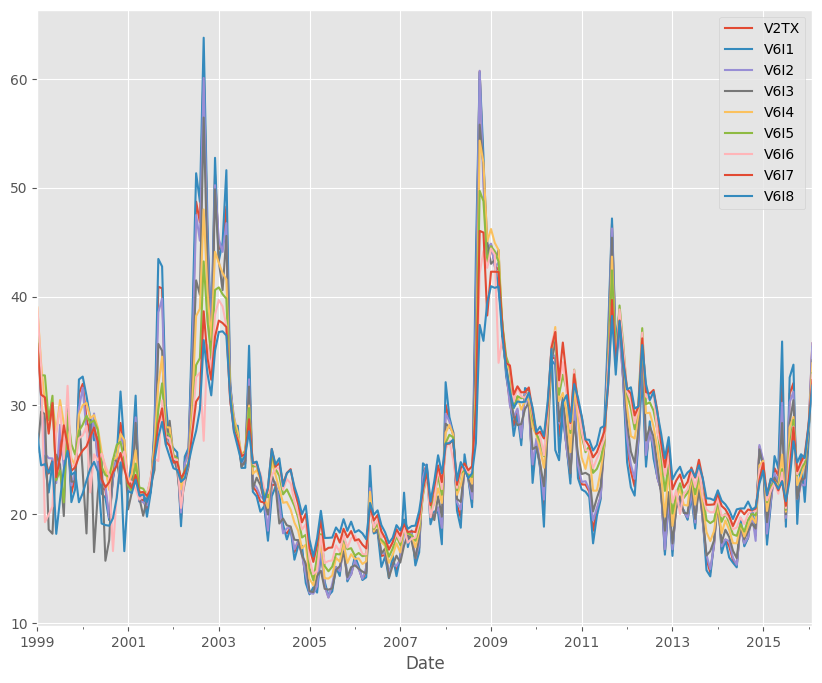

In [43]:
#vstoxx.plot(subplots=False, figsize=(10, 8), grid=True)

# plot weekly
vstoxx.resample('M').last().plot(subplots=False, figsize=(10, 8), grid=True)

In [44]:
vstoxx.pct_change().corr()

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
V2TX,1.000000,0.663967,0.948740,0.433004,0.854359,0.789582,0.272791,0.527125,0.263735
V6I1,0.663967,1.000000,0.606991,0.387965,0.553741,0.513577,0.258825,0.361883,0.196227
V6I2,0.948740,0.606991,1.000000,0.448547,0.871291,0.800313,0.290255,0.529114,0.271815
V6I3,0.433004,0.387965,0.448547,1.000000,0.446639,0.418037,0.148978,0.258750,0.107701
V6I4,0.854359,0.553741,0.871291,0.446639,1.000000,0.886842,0.344064,0.638287,0.309276
V6I5,0.789582,0.513577,0.800313,0.418037,0.886842,1.000000,0.341873,0.653633,0.428040
V6I6,0.272791,0.258825,0.290255,0.148978,0.344064,0.341873,1.000000,0.276551,0.199694
V6I7,0.527125,0.361883,0.529114,0.258750,0.638287,0.653633,0.276551,1.000000,0.467450
V6I8,0.263735,0.196227,0.271815,0.107701,0.309276,0.428040,0.199694,0.467450,1.000000


In [45]:
stoxxeu600.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SX5P    7673 non-null   float64
 1   SX5E    7673 non-null   float64
 2   SXXP    7673 non-null   float64
 3   SXXE    7673 non-null   float64
 4   SXXF    7673 non-null   float64
 5   SXXA    7673 non-null   float64
 6   DK5F    7673 non-null   float64
 7   DKXF    7673 non-null   float64
dtypes: float64(8)
memory usage: 797.5 KB


In [46]:
vstoxx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V2TX    4357 non-null   float64
 1   V6I1    3906 non-null   float64
 2   V6I2    4357 non-null   float64
 3   V6I3    4296 non-null   float64
 4   V6I4    4357 non-null   float64
 5   V6I5    4357 non-null   float64
 6   V6I6    4340 non-null   float64
 7   V6I7    4357 non-null   float64
 8   V6I8    4343 non-null   float64
dtypes: float64(9)
memory usage: 340.4 KB


In [47]:
# Market return data Stoxx
stoxxeu600_mrkret = pd.DataFrame( stoxxeu600.pct_change().mean(axis = 1).rename('stoxxeu600_ret'))
stoxxeu600_mrkret['SX5P_ret'] = stoxxeu600['SX5P'].pct_change()
stoxxeu600_mrkret.dropna(inplace=True)
stoxxeu600_mrkret

,stoxxeu600_ret,SX5P_ret
Date,,
1987-01-01,0.000000,0.000000
1987-01-02,-0.002501,-0.005303
1987-01-05,0.003545,0.001297
1987-01-06,0.005026,0.005221
1987-01-07,0.002734,0.006818
...,...,...
2016-09-28,0.006806,0.005763
2016-09-29,0.001017,0.000836
2016-09-30,0.000834,-0.002022


In [48]:
# import warneings
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Market returns data Vstoxx
vstoxx_mrkret = pd.DataFrame( vstoxx.pct_change().mean(axis = 1).rename('vstoxx_ret'))
vstoxx_mrkret['V2TX_ret'] = vstoxx['V2TX'].pct_change()
vstoxx_mrkret.dropna(inplace=True)
vstoxx_mrkret

,vstoxx_ret,V2TX_ret
Date,,
1999-01-05,0.230252,0.631089
1999-01-06,-0.065130,-0.152375
1999-01-07,0.134938,0.292188
1999-01-08,0.015625,0.021805
1999-01-11,0.085760,0.108683
...,...,...
2016-02-08,0.075842,0.111097
2016-02-09,0.023697,0.017211
2016-02-10,-0.008695,-0.015121


In [50]:
import pandas as pd

# Assuming df1 is the first dataset (with 7673 entries)
# Assuming df2 is the second dataset (with 4357 entries)

# Join df1 to df2 based on the index of df2
df_1 = pd.DataFrame(vstoxx['V2TX'])
df_2 = pd.DataFrame(stoxxeu600['SX5P'])
joined_df = df_1.join(df_2, how='inner')
joined_df = joined_df[['SX5P', 'V2TX']]

# rename
joined_df.columns = ['EUROSTOXX', 'VSTOXX']
joined_df

#
joined_ret = vstoxx_mrkret.join(stoxxeu600_mrkret, how='inner')

# Print the resulting DataFrame info
print(joined_df.info())

# Display the first few rows
joined_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4356 entries, 1999-01-04 to 2016-02-12
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EUROSTOXX  4356 non-null   float64
 1   VSTOXX     4356 non-null   float64
dtypes: float64(2)
memory usage: 102.1 KB
None


,EUROSTOXX,VSTOXX
Date,,
1999-01-04,3474.14,18.2033
1999-01-05,3535.30,29.6912
1999-01-06,3615.93,25.1670
1999-01-07,3566.02,32.5205
1999-01-08,3569.24,33.2296


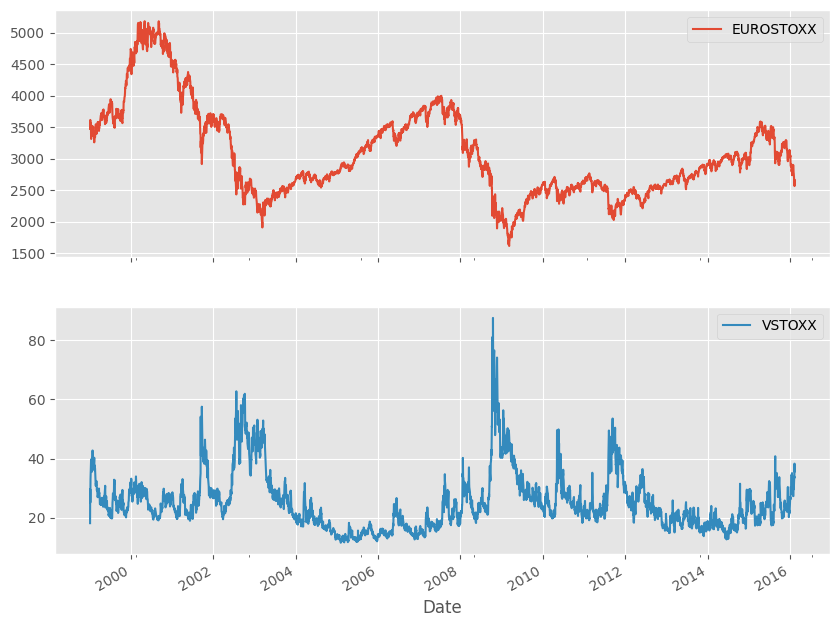

In [51]:
# Plot data: Evolution
import matplotlib.pyplot as plt
plt.style.use('ggplot')

joined_df.plot(subplots=True, figsize=(10, 8), grid=True)
plt.show()

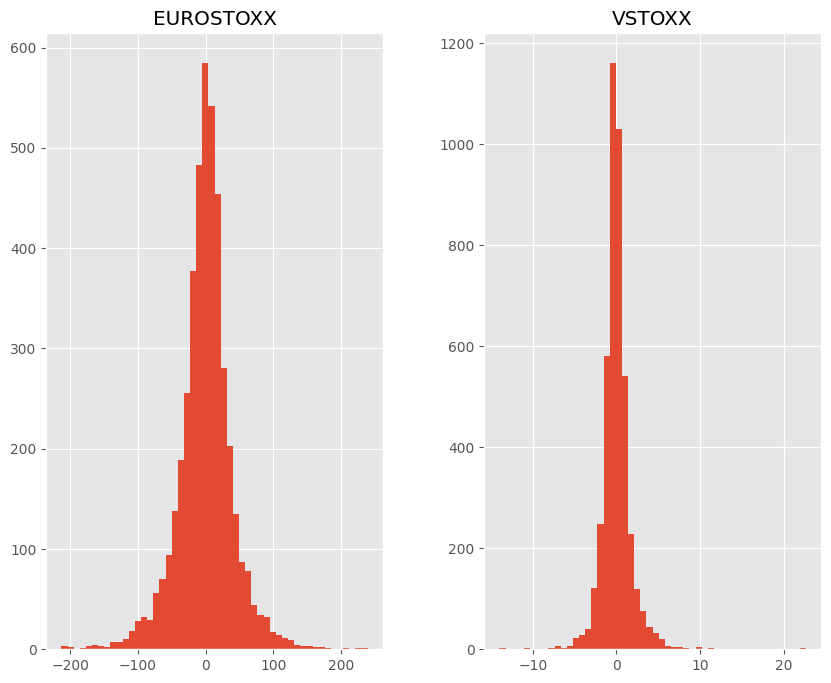

In [52]:
# Plot differences
joined_df.diff().hist(figsize=(10, 8), grid=True, bins = 50)
plt.show()

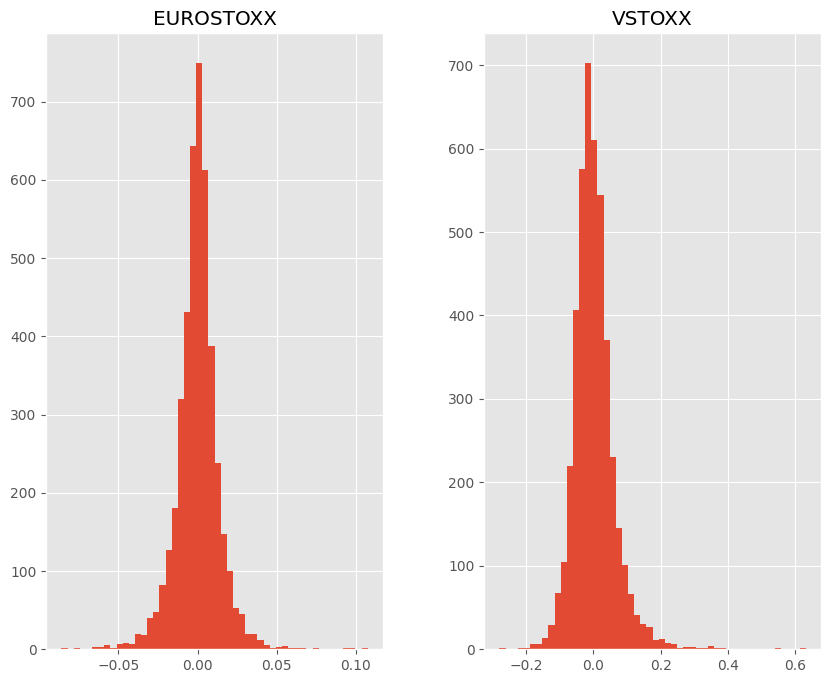

In [53]:
# plot hist of simple retunrns
joined_df.pct_change().hist(figsize=(10, 8), grid=True, bins = 50)
plt.show()

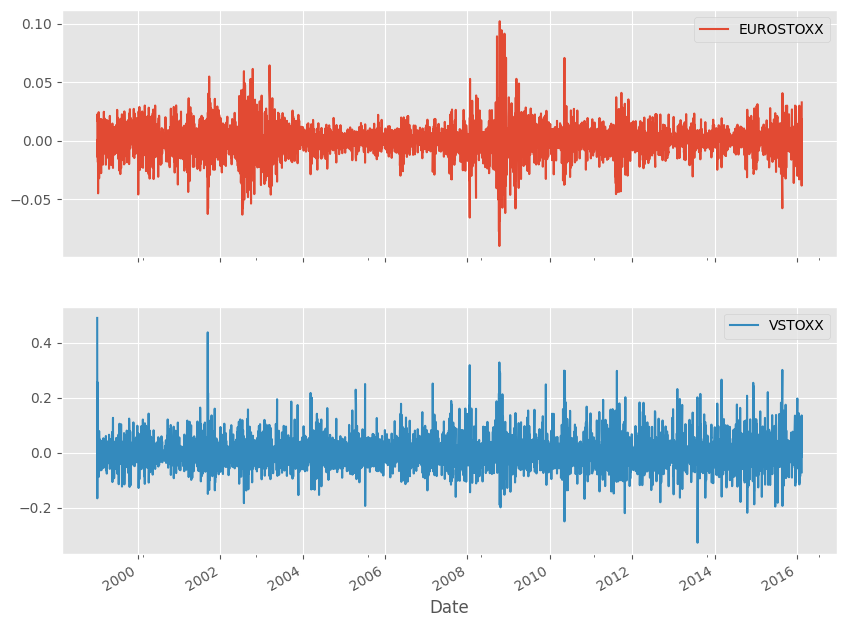

In [54]:
# Plot log returns
import numpy as np

log_rets = np.log( joined_df / joined_df.shift(1) ).dropna()
log_rets.plot(subplots = True, figsize=(10, 8), grid=True)
plt.show()

In [55]:
# Print correlation
joined_ret.corr()

,vstoxx_ret,V2TX_ret,stoxxeu600_ret,SX5P_ret
vstoxx_ret,1.000000,0.891049,-0.697283,-0.677090
V2TX_ret,0.891049,1.000000,-0.717581,-0.700388
stoxxeu600_ret,-0.697283,-0.717581,1.000000,0.973447
SX5P_ret,-0.677090,-0.700388,0.973447,1.000000


In [56]:
log_rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.00000,-0.70979
VSTOXX,-0.70979,1.00000


In [57]:
#
import statsmodels.api as sm


# ols_fit = (x,y).fit()
ols_fit = sm.OLS(log_rets['VSTOXX'].values, log_rets['EUROSTOXX'].values).fit()
print(ols_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.504
Model:                            OLS   Adj. R-squared (uncentered):              0.504
Method:                 Least Squares   F-statistic:                              4421.
Date:                Tue, 07 Jan 2025   Prob (F-statistic):                        0.00
Time:                        12:31:58   Log-Likelihood:                          7714.7
No. Observations:                4355   AIC:                                 -1.543e+04
Df Residuals:                    4354   BIC:                                 -1.542e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

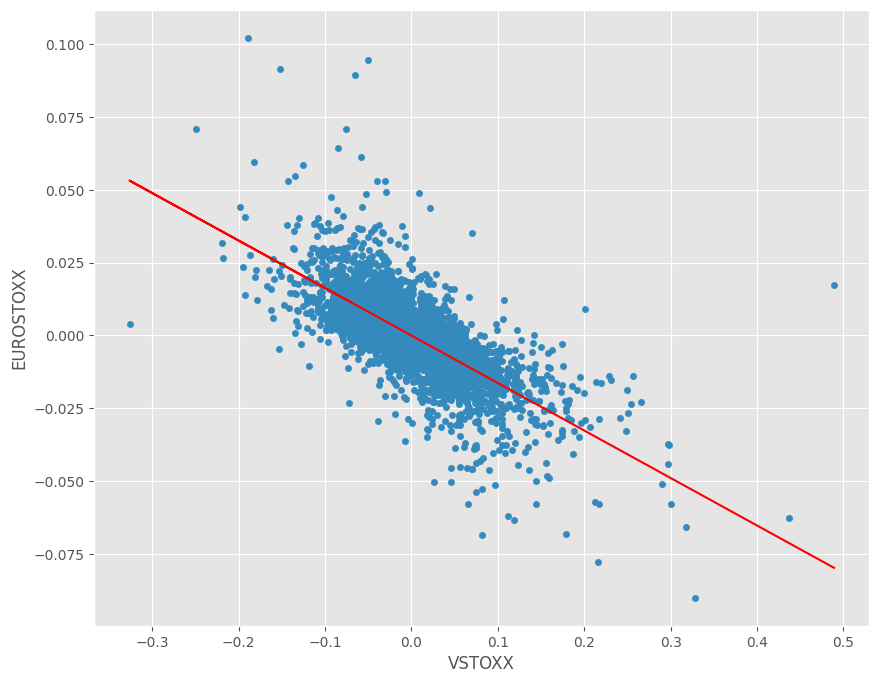

In [58]:
# Scatter plot
log_rets.plot(kind='scatter', x='VSTOXX', y='EUROSTOXX', figsize=(10, 8), grid=True)

# Fit and plot the line
x = log_rets['VSTOXX']
y = log_rets['EUROSTOXX']
m, b = np.polyfit(x, y, 1)  # Linear regression
plt.plot(x, m * x + b, color='red')

# Show  plot
plt.show()

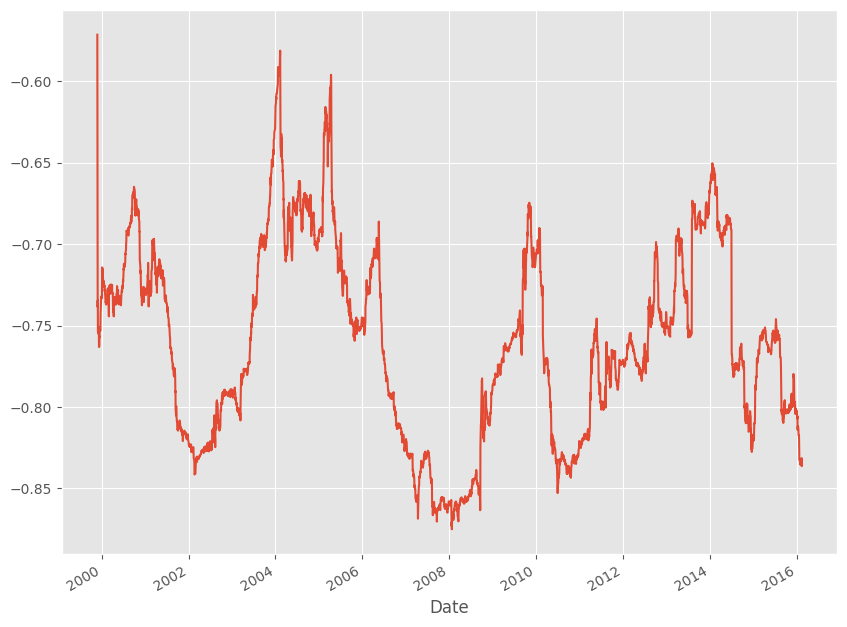

In [59]:


# Calculate rolling correlation between 'VSTOXX' and 'EUROSTOXX'
rolling_corr = log_rets['VSTOXX'].rolling(window=230).corr(log_rets['EUROSTOXX'])
rolling_corr.plot(figsize=(10, 8), grid=True)
plt.show()


# Mean Variance Optimization

In [92]:

import scipy.optimize as sco
import numpy as np

def MinVolMaxSharpe(ret):

  ''' Input: Takes in Stock Returns Matrix, computes the optimal weights for the
  given object functions: Min Vol and Max Sharpe.
  Output : return a weight matrix: Equally, Min Vol and Max Sharpe weights
  '''

  # Number of asset
  noa = len(ret.columns)

  # Initial weights: Equally weighted
  W = np.repeat(1/noa, noa)

  # Portfolio return, vol and sharpe ratio function
  def port_ret(W):
    return np.sum(ret.mean() * W) * 252


  def port_vol(W):
    return np.sqrt(np.dot(W.T,  np.dot(ret[ret < 0].cov() * 252, W)))

  def min_func_sharpe(W):
    return - (port_ret(W) - 0.025) /port_vol(W)

  # Budget and non-negativity contraints
  cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
  bnds = tuple((0.01,1) for i in range(noa))

  # Minimizing the portfolio volatility: mv
  optmv = (sco.minimize(
          # objective function: OF
          port_vol,
          # Initial guess, which is the equal weight array: IW
          W,
          method = 'SLSQP', constraints= cons, bounds= bnds))
  mvW = optmv['x']
  mvret = port_ret(optmv['x'])
  mvvol = port_vol( optmv['x'])

  eqret = port_ret(W)
  eqvol = port_vol(W)
  print(f'EquallyWReturns: {eqret * 100} Vol: {eqvol * 100}')
  print(f'MinVolReturns: {mvret * 100} Vol: {mvvol * 100}')


  # Maximizing the portfolio sharpe ratio: ms
  optms = (sco.minimize(
          # OF          # IW
          min_func_sharpe, W, method = 'SLSQP', constraints= cons,
                     bounds= bnds))
  msW = optms['x']
  msret = port_ret( optms['x'])
  msvol = port_vol(optms['x'])
  print(f'MaxSharpeReturns: {msret * 100} Vol: {msvol * 100}')
  print()

  dataW = pd.DataFrame({'EqualW': W,  'MinVolW': mvW, 'MaxShapW': msW})

  return dataW

In [118]:
## In sample period until 2011
in_sample = stoxxeu600.loc['2001':'2011']

# compute portfolio weights to be used for 2012
weights = MinVolMaxSharpe(in_sample.pct_change().dropna() )

weights_all = weights

# Out sample returns 2012
out_sample = stoxxeu600.loc['2012']

# Calculate out-sample portfolio returns 2012
portRet_12 = pd.DataFrame(out_sample.pct_change().values @ weights )
portRet_12.index = out_sample.index
portRet_12.dropna(inplace= True)
print(len(portRet_12))



## In sample period until 2012
in_sample = stoxxeu600.loc['2001':'2012']

# compute portfolio weights to be used for 2013
weights = MinVolMaxSharpe(in_sample.pct_change().dropna() )
weights_all = pd.concat([weights_all, weights])

# Out sample returns 2013
out_sample = stoxxeu600.loc['2013']

# Calculate out-sample portfolio returns 2013
portRet_13 = pd.DataFrame(out_sample.pct_change().values @ weights )
portRet_13.index = out_sample.index
portRet_13.dropna(inplace= True)
print(len(portRet_13))





## In sample period until 2013
in_sample = stoxxeu600.loc['2001':'2013']

# compute portfolio weights to be used for 2014
weights = MinVolMaxSharpe(in_sample.pct_change().dropna() )
weights_all = pd.concat([weights_all, weights])

# Out sample returns 2014
out_sample = stoxxeu600.loc['2014']

# Calculate out-sample portfolio returns 2014
portRet_14 = pd.DataFrame(out_sample.pct_change().values @ weights )
portRet_14.index = out_sample.index
portRet_14.dropna(inplace= True)
print(len(portRet_14))




## In sample period until 2014
in_sample = stoxxeu600.loc['2001':'2014']

# compute portfolio weights to be used for 2015
weights = MinVolMaxSharpe(in_sample.pct_change().dropna() )
weights_all = pd.concat([weights_all, weights])

# Out sample returns 2015
out_sample = stoxxeu600.loc['2015']

# Calculate out-sample portfolio returns 2015
portRet_15 = pd.DataFrame(out_sample.pct_change().values @ weights )
portRet_15.index = out_sample.index
portRet_15.dropna(inplace= True)
print(len(portRet_15))

# Print weights
print(weights_all)
# Now concat all returns
portRet = pd.concat([portRet_12, portRet_13 ,portRet_14, portRet_15 ])
portRet

EquallyWReturns: -0.7805929549310741 Vol: 16.535226334838008
MinVolReturns: 0.0024887231788152217 Vol: 15.431978011128667
MaxSharpeReturns: 2.720450472274607 Vol: 17.96860091422542

256
EquallyWReturns: 0.5228177142378292 Vol: 16.191130889608786
MinVolReturns: 1.1571753938657974 Vol: 15.056704016854214
MaxSharpeReturns: 3.9178965786174316 Vol: 17.653064742581037

255
EquallyWReturns: 1.7744832557688008 Vol: 15.900037220365085
MinVolReturns: 2.1770924183417875 Vol: 14.757390782882068
MaxSharpeReturns: 5.042660297869657 Vol: 17.364343718645088

255
EquallyWReturns: 1.9899662992645561 Vol: 15.628174965790912
MinVolReturns: 2.5146661066242597 Vol: 14.508868022130955
MaxSharpeReturns: 5.0607165783975745 Vol: 17.014565695055513

256
   EqualW   MinVolW  MaxShapW
0   0.125  0.010000      0.01
1   0.125  0.010000      0.01
2   0.125  0.010000      0.01
3   0.125  0.010000      0.01
4   0.125  0.052060      0.01
5   0.125  0.887940      0.01
6   0.125  0.010000      0.93
7   0.125  0.010000    

,EqualW,MinVolW,MaxShapW
Date,,,
2012-01-03,0.013720,0.020270,0.013787
2012-01-04,-0.009018,-0.000504,-0.011319
2012-01-05,-0.006283,-0.005685,0.004897
2012-01-06,-0.000764,0.003441,0.001114
2012-01-09,-0.004485,-0.004318,-0.004510
...,...,...,...
2015-12-24,-0.000181,-0.000357,0.000392
2015-12-28,-0.005445,-0.003058,-0.005788
2015-12-29,0.015281,0.012381,0.015173


In [119]:
# Portfolio weights description
weights_all.describe().round(5)

,EqualW,MinVolW,MaxShapW
count,32.000,32.00000,32.00000
mean,0.125,0.12500,0.12500
std,0.000,0.30524,0.30913
min,0.125,0.01000,0.01000
25%,0.125,0.01000,0.01000
50%,0.125,0.01000,0.01000
75%,0.125,0.01000,0.01000
max,0.125,0.93000,0.93000


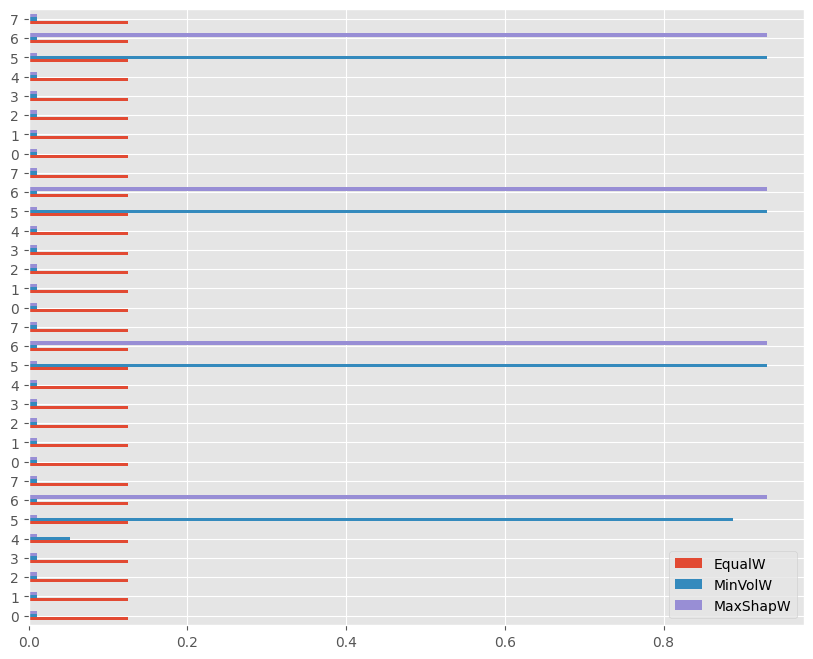

In [120]:
# Portfolio Weight distribution
weights_all.plot(kind = 'barh', figsize=(10, 8), grid=True)
plt.show()

In [121]:
# Compute cumaltive product
cum_portRet = (portRet + 1).cumprod()

# View begining and final value
cum_portRet

,EqualW,MinVolW,MaxShapW
Date,,,
2012-01-03,1.013720,1.020270,1.013787
2012-01-04,1.004579,1.019756,1.002312
2012-01-05,0.998267,1.013959,1.007221
2012-01-06,0.997504,1.017448,1.008343
2012-01-09,0.993030,1.013054,1.003796
...,...,...,...
2015-12-24,1.465804,1.459222,1.506364
2015-12-28,1.457824,1.454760,1.497646
2015-12-29,1.480101,1.472771,1.520369


In [96]:
#  Function to compute (out-sample portfolio) performance metrics

def MaxDrawdown(returns: pd.DataFrame)-> float:
  """ Takes in portfolio return data, and computes maximum drawdown from peak to trough
  """
  cum_ret = (1 + returns).cumprod()
  cum_ret_max = cum_ret.cummax()
  max_drawdown = (cum_ret - cum_ret_max) / cum_ret_max

  return max_drawdown.min()

def perf_metrics(port_ret: pd.DataFrame, sig: float=0.05) -> list[float]:

  """ Takes in dailyly portfolio return df, and computes metrics.
  sig: the significance level for VaR and CVaR, defaul 5%
  """

  # Compute portfolio performance metrics
  ann_ret = np.nanmean(port_ret) * 252 * 100                     # annualized average returns
  vol = np.nanstd(port_ret) * np.sqrt(252) * 100                 # annualized volatility
  SR = ann_ret / vol                                            # Sharpe ratio
  geo_mean = (np.exp(np.log(1 + port_ret)).mean()) - 1          # geometric returns
  ann_gm = ((1 + geo_mean) ** len(port_ret) - 1 ) * 100         # annualized geometric returns
  #cumret = (np.exp(port_ret.sum()) - 1) * 100                  # cumulative returns same as Ann. Geo Returns
  d_vol = np.nanstd(port_ret[port_ret<0]) * np.sqrt(52) * 100   # annualized downside deviation
  MDD = MaxDrawdown(port_ret) * 100                             # maximum drawdown (daily)
  VaR = port_ret.quantile(sig)                                  # daily VaR
  CVaR = (port_ret[port_ret<=VaR].mean())                       # daily CVaR

  # Metrics
  metrs = [ann_ret, vol, SR, ann_gm, d_vol, MDD, VaR * 100, CVaR * 100]

  return metrs

In [125]:
rets = stoxxeu600.loc['2013':'2015'].pct_change().dropna()
print(rets.info())
met_rets = rets.apply(perf_metrics)
met_rets.index = ['Annz. Ret', 'Annz. Vol', 'Sharpe Ratio', 'Annz. G.Ret',   'Down_Vol', 'MaxDrawD', 'VaR_5%', 'CVaR_5%']
met_rets.style.format(precision=2).background_gradient(cmap = 'summer', axis=1)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 768 entries, 2013-01-03 to 2015-12-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SX5P    768 non-null    float64
 1   SX5E    768 non-null    float64
 2   SXXP    768 non-null    float64
 3   SXXE    768 non-null    float64
 4   SXXF    768 non-null    float64
 5   SXXA    768 non-null    float64
 6   DK5F    768 non-null    float64
 7   DKXF    768 non-null    float64
dtypes: float64(8)
memory usage: 54.0 KB
None


,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
Annz. Ret,6.75,7.92,9.34,9.85,10.59,9.07,10.17,11.51
Annz. Vol,15.78,18.92,15.40,17.30,15.73,14.66,16.30,15.94
Sharpe Ratio,0.43,0.42,0.61,0.57,0.67,0.62,0.62,0.72
Annz. G.Ret,22.83,27.28,32.92,35.01,38.10,31.85,36.33,42.01
Down_Vol,5.21,6.02,5.08,5.56,5.10,4.93,5.27,5.16
MaxDrawD,-19.11,-21.14,-18.07,-19.26,-18.47,-17.56,-19.09,-18.05
VaR_5%,-1.58,-1.90,-1.55,-1.79,-1.63,-1.46,-1.65,-1.60
CVaR_5%,-2.35,-2.77,-2.27,-2.54,-2.31,-2.17,-2.36,-2.31


<Axes: xlabel='Date'>

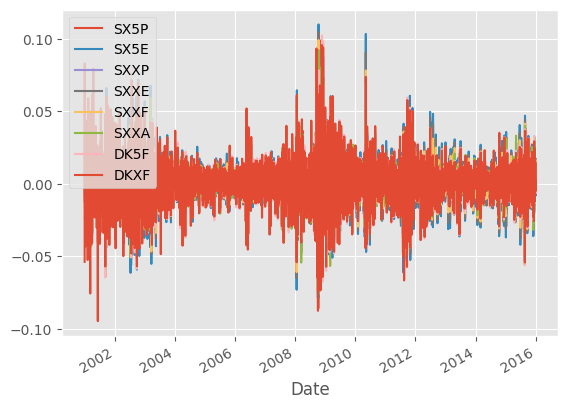

In [123]:
rets.plot()

In [110]:
portRet

,EqualW,MinVolW,MaxShapW
Date,,,
2012-01-03,0.013720,0.019918,0.013787
2012-01-04,-0.009018,-0.000910,-0.011319
2012-01-05,-0.006283,-0.005841,0.004897
2012-01-06,-0.000764,0.003205,0.001114
2012-01-09,-0.004485,-0.004301,-0.004510
...,...,...,...
2015-12-24,-0.000181,-0.000355,0.000392
2015-12-28,-0.005445,-0.003224,-0.005788
2015-12-29,0.015281,0.012728,0.015173


In [97]:
## Euro Indices returns
# Use color map summer on rows: green to yellow
#out_results =  {key: df.apply(perf_metrics).T for key, df in .items()}
out_results = portRet.apply(perf_metrics)
#out_results
out_results.index = ['Annz. Ret', 'Annz. Vol', 'Sharpe Ratio', 'Annz. G.Ret',   'Down_Vol', 'MaxDrawD', 'VaR_5%', 'CVaR_5%']
out_results.style.format(precision=2).background_gradient(cmap = 'summer', axis=1)

,EqualW,MinVolW,MaxShapW
Annz. Ret,10.68,10.44,11.58
Annz. Vol,15.76,14.33,16.53
Sharpe Ratio,0.68,0.73,0.70
Annz. G.Ret,54.18,52.71,59.92
Down_Vol,5.07,4.69,5.37
MaxDrawD,-18.55,-17.65,-19.04
VaR_5%,-1.63,-1.47,-1.73
CVaR_5%,-2.30,-2.09,-2.43


            EqualW      MinVolW     MaxShapW
count  1022.000000  1022.000000  1022.000000
mean      0.000424     0.000414     0.000459
std       0.009934     0.009031     0.010415
min      -0.053569    -0.055065    -0.055910
25%      -0.004645    -0.004067    -0.004964
50%       0.000605     0.000582     0.000758
75%       0.005696     0.004916     0.006189
max       0.041241     0.040107     0.037861



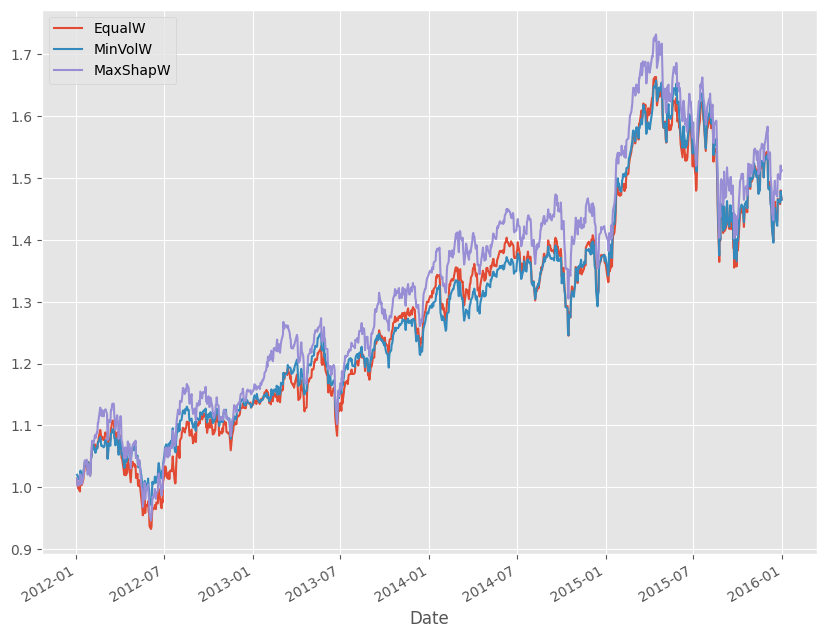

In [98]:
print(portRet.describe())
print()
cum_portRet.plot( figsize=(10, 8), grid=True)
plt.show()

              EqualW   MinVolW  MaxShapW
Date                                    
2012-01-03  1.013815  1.020117  1.013883
2012-01-04  1.004714  1.019189  1.002471
2012-01-05  0.998420  1.013254  1.007393
2012-01-06  0.997658  1.016507  1.008516
2012-01-09  0.993193  1.012144  1.003978
...              ...       ...       ...
2015-12-24  1.541474  1.527160  1.592164
2015-12-28  1.533104  1.522244  1.582975
2015-12-29  1.556711  1.541743  1.607176
2015-12-30  1.547257  1.534606  1.596481
2015-12-31  1.541908  1.527275  1.599341

[1022 rows x 3 columns]


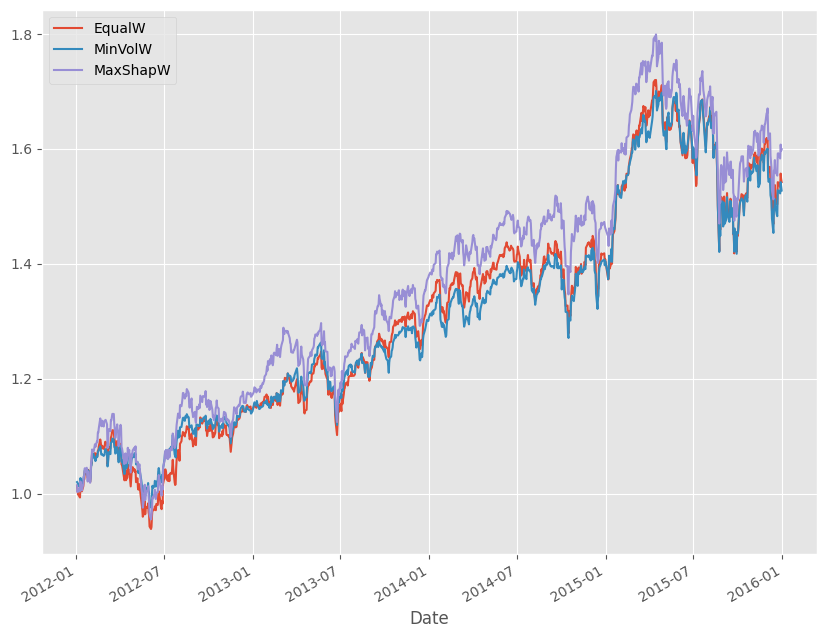

In [99]:
cum_exp = portRet.cumsum().apply(np.exp)
print(cum_exp )
cum_exp.plot( figsize=(10, 8), grid=True)
plt.show()